# Behavioural Pattern of Cyclistic Clients

# Introduction
Cyclistics is a bike-share company based in Chicago and it is currently focusing on ways to scale up revenue in the same city. The company's finance analysts having a good understanding of its finacial structures have concluded that **Subcribers** ,clients who are being billed upfront for the service annually  are much more profitable compared to **Customers** who pay per use. In the light of this development, the marketing team are preparing to lunch a marketing program to influence more customers to becoming active subscribers.

In order to achieve this business goal, it is necessary to compare the bevahioural patterns of the two client subgroups before taking a decision on how best to influence them. I am being imagined as a junior data analyst working in the marketing analyst team of this company and this project is in partial fulfulment of the Google Data analytics Cetificate. We'd  be taking a deep dive into data analytics concepts to draw useful insight that will help achieve the team's goal





# Business statement:
We are taking a deep dive into data analytics concepts to determine how Subscribers (annual/regular members) and Customers (casual riders) use Cyclistic bikes differently. Our goal is as listed below and having them in mind will help us keep to the business question.
- Determine how annual members and casual riders use Cyclistic bikes differently
- Depicting important factors that are more likely to influence customers to buy annual memberships
- Identify how best to use digital medial to influence customers to becoming subscribers


# Dataset
The data we would be using to explore how different client types are using Cyclistic bikes is a public dataset and it is available for dowload [here](https://divvy-tripdata.s3.amazonaws.com/index.html). The data has been made available by Motivate International Inc  under this [license](https://www.divvybikes.com/data-license-agreement). We have been instructed by Google to download the previous 12 months of Cyclistic trip data. We are going to be using the `2019` (i.e Q1,Q2,Q3 & Q4) historical trip data for the analyis. 

### Data Dictionary

- ` trip_id`: The unique identifier for each trip
- `start_time`: The date and time the rider starts a trip
- `end_time` : The date and time at the end of the ride
- `bikeid`: The unique identifer for each bike
- `tripduration`:The time amount in seconds to complete a trip
- `from_station_id`: The unique identifier of the station where a rider picks up bike to start a trip 
- `from_station_name`: The name of the station where a rider picks up bike to start a trip 
- `to_station_id`: The unique identifier of the station where a rider returns bike at the end of the trip
- `to_station_name`:The name of the station where a rider returns bike at the end of his trip
- `usertype`: The categories of cyclistics clients, `Subscribers` and `Customers`
- `gender` : The sex of the clients
- `birthyear`: The date year of birth of the clients

I will be taking you through this analysis using Python as oppossed to R used in the Data Analytics Course. This is due to pesonal preference and convinience. So let's get started by importing the necessary Python librabries need for the analyis



In [1]:
#load the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from datetime import timedelta 
from datetime import datetime

The downloaded files have been renamed for clearity sake. 1st quarter (Q1) data has been renamed `bikeshare_q1.csv`, 2nd quarter(Q2) as `bikeshare_q2.csv`, 3rd quarter(Q3) as `bikeshare_q3.csv` and 4th quarter(Q4) as `bikeshare_q4.csv`.
We would also be creating a reference for each file name in a dictionary in the order q1 for Q1, q2 for Q2 and so on.








In [2]:
# insert the file names in a dictionary accordingly
data={
    "q1":"bikeshare_q1.csv",
    "q2":"bikeshare_q2.csv",
    "q3":"bikeshare_q3.csv",
    "q4":"bikeshare_q4.csv"
}

# Data Cleaning
The columns of each quarterly trip data have been examined on Excel so the q1,q3 & q4 has the following clolumns: `trip_id`, `'start_time'`, `'end_time'`, `'bikeid'`, `'tripduration'`,`'from_station_id'`, `'from_station_name'`, `'to_station_id'`, `to_station_name`, `'usertype'`, `'gender'`, `'birthyear'`.

However the q2 has the following columns: `01 - Rental Details Rental ID'`, `'01 - Rental Details Local Start Time'`,`'01 - Rental Details Local End Time'`, `'01 - Rental Details Bike ID'`,`'01 - Rental Details Duration In Seconds Uncapped'`,`'03 - Rental Start Station ID'`, `'03 - Rental Start Station Name'`,`'02 - Rental End Station ID'`, `'02 - Rental End Station Name'`,`'User Type'`, `'Member Gender'`,`'05 - Member Details Member Birthday Year'`.


Although both list of columns have name difference, they logically have the same meaning. Because of this inconsistency, we'd be creating a list of columns for our header while we read these files into pandas
and next we'd concatenate the files into a single file since they have similar attributes


In [3]:
#create a list of columns header
head=['trip_id',
      'start_time',
      "end_time",
      "bikeid",
      "tripduration",
      "from_station_id",
      "from_station_name",
      "to_station_id",
      "to_station_name",
      "usertype","gender",
      "birthyear"]

The above column list will be passed as a new header argument while we exclude the original header.
Now let's read the files into pandas.

In [4]:
#read q1-q4 into pandas
bikeshare_q1=pd.read_csv(data['q1'],header=None,skiprows=1,names=head)

bikeshare_q2=pd.read_csv(data['q2'],header=None,skiprows=1,names=head)

bikeshare_q3=pd.read_csv(data['q3'],header=None,skiprows=1,names=head)

bikeshare_q4=pd.read_csv(data['q4'],header=None,skiprows=1,names=head)

In [5]:
#concatenate q1-q4 data into a single data frame
bike_data=pd.concat([bikeshare_q1,bikeshare_q2,bikeshare_q3,bikeshare_q4])
bike_data.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


#### Obsrevations
Our raw data has 12 columns and 3818004 rows. scanning the first 5 rows we are able to make the following observations:

`tripduration`- some cells have commas " ,"  which may confuse pandas to consider it as numeric

`birthyear`- the data type is float instead of type integer

Next, let's proceed to undestanding the data structure of our data. For this purpose we'll using the *info()* function

In [6]:
bike_data.info()
print("shape of the data:",bike_data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818004 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_id            int64  
 1   start_time         object 
 2   end_time           object 
 3   bikeid             int64  
 4   tripduration       object 
 5   from_station_id    int64  
 6   from_station_name  object 
 7   to_station_id      int64  
 8   to_station_name    object 
 9   usertype           object 
 10  gender             object 
 11  birthyear          float64
dtypes: float64(1), int64(4), object(7)
memory usage: 378.7+ MB
shape of the data: (3818004, 12)


### Observations
- `start_time`: data type is string instead of as type datetime
- `end-time` :data type is string instead of as type datetime
- `tripduration`: has commas' in ts values and it data type is string intead of integer
- `birthyear`: data type is float rather than integer
- `gender` :possibly has null values which we are going to be replacing with *unecorded*

The dataset is a large one with 3818004 rows

In [7]:
#covert to the correct data types
bike_data['start_time']=pd.to_datetime(bike_data['start_time'])#convert column to datetime
bike_data['end_time']=pd.to_datetime(bike_data['end_time'])#convert column to datetime

#remove "," from every cell in the column
bike_data.replace({
    'tripduration':'[\,]'
},'',regex=True,inplace=True) 
bike_data['tripduration']=bike_data.tripduration.astype(float).astype(int) #convert colum
bike_data['gender']=bike_data['gender'].fillna('Unrecorded') #fill empty cell with Unrecoreded



We can confirm the changes made to our data. Now that the columns are in the right format let's have a bird's eye view of the data. It would be helpful in dealing with the numeric variables. If there are outliers, we'd have an idea and if there isn't we move one. So let's do that with this function, *describe()* 

In [8]:
#summarize the data
bike_data.describe()

,trip_id,bikeid,tripduration,from_station_id,to_station_id,birthyear
count,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06,3.279253e+06
mean,2.391563e+07,3.380252e+03,1.450203e+03,2.016659e+02,2.026363e+02,1.984074e+03
std,1.212667e+06,1.902511e+03,2.985414e+04,1.560798e+02,1.562388e+02,1.086898e+01
min,2.174244e+07,1.000000e+00,6.100000e+01,1.000000e+00,1.000000e+00,1.759000e+03
25%,2.287379e+07,1.727000e+03,4.110000e+02,7.700000e+01,7.700000e+01,1.979000e+03
50%,2.396232e+07,3.451000e+03,7.090000e+02,1.740000e+02,1.740000e+02,1.987000e+03
75%,2.496370e+07,5.046000e+03,1.283000e+03,2.890000e+02,2.910000e+02,1.992000e+03
max,2.596290e+07,6.946000e+03,1.062840e+07,6.730000e+02,6.730000e+02,2.014000e+03


### observations
We can observe the following from the summary table above:
- It is almost impossible to rent a bike for 10628400 secs, appoximately 123days
- It is almost impossible to rent and return a bike within 60secs

Apparently, with the aid of the 5 number summary we can see the ouliers in the data. If they are left unremoved, the data would be skewed which will affect our analysis. We don't want to have a false impression of the data!

up next we'd be removing the outliers from this data. before we dive right into it.
We are going to be making the following assumptions:
- The minimum duration a rider can spend on trip is 900sec (15 minutes)
- the maximum duration allowed for a rider to return bike to dock is 14400 sec (240 minutes)


So let's dive in and filter the data

In [9]:
#filter out tripduration below 900secs and above 14400secs 
bike_data=bike_data[bike_data['tripduration'].between(900, 14400)]
#Check the data structure
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1484945 entries, 3 to 704050
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   trip_id            1484945 non-null  int64         
 1   start_time         1484945 non-null  datetime64[ns]
 2   end_time           1484945 non-null  datetime64[ns]
 3   bikeid             1484945 non-null  int64         
 4   tripduration       1484945 non-null  int32         
 5   from_station_id    1484945 non-null  int64         
 6   from_station_name  1484945 non-null  object        
 7   to_station_id      1484945 non-null  int64         
 8   to_station_name    1484945 non-null  object        
 9   usertype           1484945 non-null  object        
 10  gender             1484945 non-null  object        
 11  birthyear          1064756 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int32(1), int64(4), object(4)
memory usage: 141.6+ 

#### Observation
The `birthyear` column has null values. The data type is float instead of integer. We will not make changes to this column now. However, a separate data fame would be use to compute any calculations or analysis that warant the use of date of birth as time goes on in the project.

### Calculations
 In the next section we'd be performing some simple calucations and getting to have the months and day of the week riders use bikes.
The trip_duration is the time difference between end_time and start_time
 month
 
 `trip_duration`=`end_time`-`start_time`
 
Should you wish to confirm, uncomment the codes below and run. One would see that it is the same as `tripduration` already presented in the data.

In [10]:

# #calculate the time differenece and return the time seconds
# time_diff=(bike_data["end_time"]-bike_data["start_time"])/(timedelta(seconds=1))
# # insert the time difference into the data frame
# bike_data.insert(loc=4,column="triduration_min",value=time_diff.astype(int))
# bike_data.head()

bike_data["tripduration"]=((bike_data["tripduration"])/60) #present tripduration in minutes
bike_data.head(3)


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,29.716667,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
8,21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,28.783333,150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995.0
14,21742457,2019-01-01 00:23:54,2019-01-01 00:39:00,5019,15.100000,289,Wells St & Concord Ln,324,Stockton Dr & Wrightwood Ave,Subscriber,Female,1989.0


We can confirm the changes made to the data. We can now proceed to adding additional columns that would be useful in answering the business question. 
#### Additional Columns
We assume bikes to be returned to dock station after use same day
Therefore, we would be creating additional columns that would be useful in our analysis going forward. We'd be using the *start_time* column to compute the following variables:

- `start_month`- the month the rider embarked on the trip

- `start_weekday`-the day of the week the rider embarked on the trip

- `start_hour`-the hour of the day the rider embarked on the trip


In [11]:
start=bike_data["start_time"].dt
bike_data.insert(loc=2,column="start_month",value=start.month)#insert month riders begin the trip
bike_data.insert(loc=3,column="start_day",value=start.day)# insert day riders begin the trip
bike_data.insert(loc=4,column="start_weekday",value=start.weekday) # insert  weekday riders begin the trip
bike_data[:4]

,trip_id,start_time,start_month,start_day,start_weekday,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
3,21742446,2019-01-01 00:13:45,1,1,1,2019-01-01 00:43:28,252,29.716667,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
8,21742451,2019-01-01 00:18:43,1,1,1,2019-01-01 00:47:30,6205,28.783333,150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995.0
14,21742457,2019-01-01 00:23:54,1,1,1,2019-01-01 00:39:00,5019,15.100000,289,Wells St & Concord Ln,324,Stockton Dr & Wrightwood Ave,Subscriber,Female,1989.0
17,21742460,2019-01-01 00:24:27,1,1,1,2019-01-01 00:47:03,5777,22.600000,268,Lake Shore Dr & North Blvd,319,Greenview Ave & Diversey Pkwy,Customer,Female,1990.0


Our data now looks clean except for the *birthyear* conatining null values. we couldn't have replaced the null values and if we choose to drop the affected columns, it would reduce the rows significantly.
We will proceed with the analysis  and much later when we have need of the birth year we will filter out the null values  into a new data frame. 

# Analysis



In [12]:

#population of clients
client_pop=bike_data.groupby("usertype")["trip_id"].count().reset_index().rename({"trip_id":"population",
                                                                                  "usertype":"client"},axis=1)


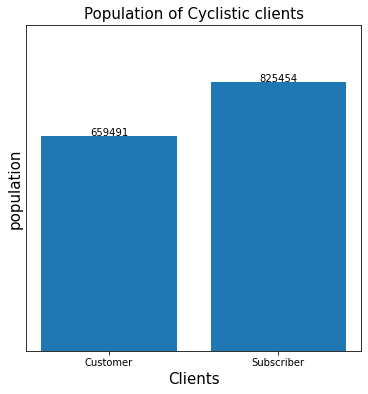

In [13]:
#create a function to add text
def add_text(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha="center")
        
fig,ax=plt.subplots(figsize=(6,6) )             
plt.bar(client_pop["client"],client_pop["population"])
plt.ylim(0,1000000)
add_text(client_pop["client"],client_pop["population"])
plt.title("Population of Cyclistic clients", fontsize=15)
plt.xlabel("Clients", fontsize=15)
plt.yticks([])
plt.ylabel("population", fontsize=15)
plt.show()

Currently, Subscribers make up 56% of Cyclistic clients while the remaining 44% are customer clients which tells us that cyclistic is currently performing fairly in marketing subscriptions to its clients in the absence of the proposed program. In addtion, we cannot tell if the 12% positive diffence is significant enough to judge the company's strength in retaining subscribers

Still describing the data. Let's have an oveview of the gender population

In [14]:
gender_pop=bike_data.groupby("gender")["trip_id"].count().reset_index().rename({"gender":"Sex",
                                                                                "trip_id":"Population"},axis=1)
gender_pop

,Sex,Population
0,Female,349774
1,Male,706475
2,Unrecorded,428696


The population of male clients is 48%, female is 26%. About 29% of the clients have their gender unrecorded.

Male clients are more eprensented than females.Males naturally drift toward physical activities unlike females who  may naturally prefer fun activies like partying.

In [15]:
#3-dimentional table comprising the gender, usertype and their populations 
gender_usertype=bike_data.groupby(["usertype","gender"])["trip_id"].count().unstack()
gender_usertype.index=list(gender_usertype.index)
gender_usertype

gender,Female,Male,Unrecorded
Customer,100052,138777,420662
Subscriber,249722,567698,8034


In [16]:
bike_data_copy=bike_data.copy() #make copy from the original dataframe
bike_data_copy["start_time"]=bike_data_copy["start_time"].dt.date# convert start time in copied dataframe to date
bike_data_copy["tripduration"]=(bike_data_copy["tripduration"])/60
df_trip_date=bike_data_copy[["start_time","trip_id","usertype","tripduration"]] #select the columns of interest
trip_per_date = (df_trip_date.groupby('start_time')['trip_id']
         .count()
         .reset_index(name='no_of_trips') #determine the number of trips per start time date
    )

trip_per_date[:5]

,start_time,no_of_trips
0,2019-01-01,353
1,2019-01-02,796
2,2019-01-03,1233
3,2019-01-04,1832
4,2019-01-05,2705


It appears that the number of trips is being afected my the time of the year. The first 5 data shows an upward trend. However, we cannot conclude just like that. Visualization will give us the true picture because we humans naturally appreaciate tabulated numbers less.

Let's go straight to preparing the variables we would be needing for the descriptive statistic

In [17]:
#determine the yearly trip count per date by each client subgroup
client_tripcount_per_date = (df_trip_date.groupby(['start_time','usertype'])['trip_id']
         .count()
         .reset_index(name='no_of_trips') #determine the number of trips per start time date
    )
client_tripcount_per_date[:5]

,start_time,usertype,no_of_trips
0,2019-01-01,Customer,86
1,2019-01-01,Subscriber,267
2,2019-01-02,Customer,63
3,2019-01-02,Subscriber,733
4,2019-01-03,Customer,169


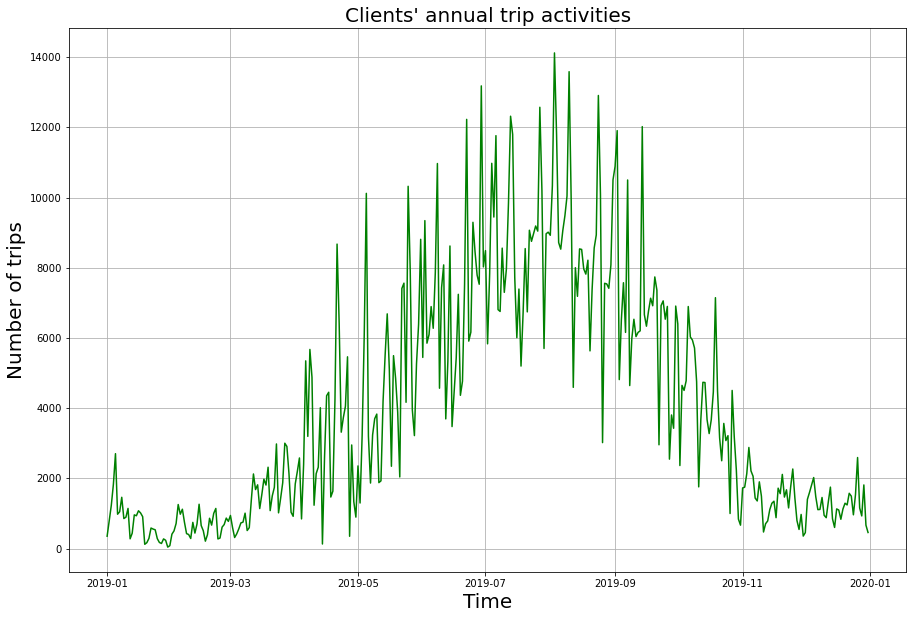

In [18]:
# plot a graph 
fig,ax=plt.subplots(figsize=(15,10))
plt.plot(trip_per_date["start_time"],trip_per_date["no_of_trips"],color="green")
plt.title("Clients' annual trip activities",fontsize=20)
plt.ylabel("Number of trips",fontsize=20)
plt.xlabel("Time",fontsize=20)
plt.grid()
plt.show()

We can see that clients rarely use  bikes at the begining of the year which account for about 25% of the time. However, the number of times clients embarked on trips surged around late April and steadily increased till it peaked in July. Most riding acitvity starts from July to August and gradually falls till the next season. Apparently, clients actively use bikes more between May and October which account for about 50% of the time. For the remaining part, clients riding activity is less.

This distribution is obviously being affected by seasonality. Could there be some lurking variables in the data like temperature responsible for its seasonality? Before then, Let's see if subscriber clients and customer clients have similar distribution considering the number of trips undergone

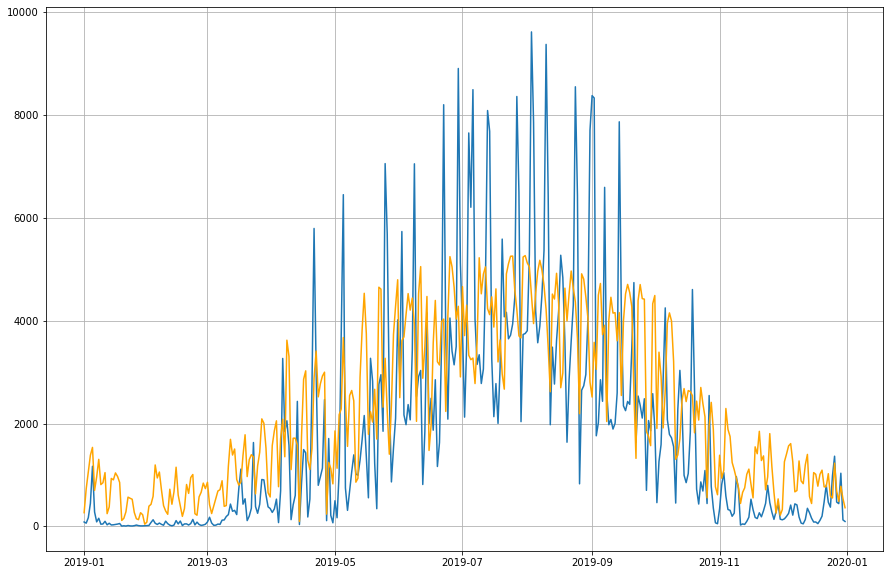

In [19]:
cust_tripcount=client_tripcount_per_date[client_tripcount_per_date['usertype']=="Customer"] #filter out subscribers
sub_tripcount=client_tripcount_per_date[client_tripcount_per_date['usertype']=="Subscriber"] #filter out customer clients

#plot the outcome 
fig, ax=plt.subplots(figsize=(15,10))
plt.plot(cust_tripcount["start_time"],cust_tripcount["no_of_trips"],label="Customer")
plt.plot(sub_tripcount["start_time"],sub_tripcount["no_of_trips"], color="orange",label="Subscribers")
plt.grid()
plt.show()

Subscribers took more trips than the Customers in the early part of the year, January to April and towards the end of the year. Hovever, the customer clients are seen to have been activitely taken more trips than the other clients between late April to and early September before they began to take similar number of trips.

The period at which clients use bikes actively is between May and October. Here we can see that customer clients make the most of this period than the subscribers. Howver, the way subscribers use bikes is more balanced compared to the Customers which is an indication that Subcribers are more intentional about the use of bikes. They could be using bikes to transport themselves to work. On the other hand, the  Customers could be seeing riding as recreation.

So now let's dig deeper into the weekly trend and the daily trends of these two client types

In [20]:
#create a list of indexes, month and week 
month=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
weekday=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

# select and filter out customer clients' weekly data
sub_weekly_data = (bike_data['start_weekday'][bike_data['usertype']=='Subscriber']
                  ).value_counts().sort_index(ascending=True)

# select and filter out customer clients' daily data
sub_daily_data = ((bike_data['start_time'][bike_data['usertype']=='Subscriber']
                  ).dt.hour).value_counts().sort_index(ascending=True)

# select and filter out subscriber's weekly data
cus_weekly_data = (bike_data['start_weekday'][bike_data['usertype']=='Customer']
    ).value_counts().sort_index(ascending=True)

#select and filter out subscribers'daily data
cus_daily_data = ((bike_data['start_time'][bike_data['usertype']=='Customer']).dt.hour
    ).value_counts().sort_index(ascending=True)

#reset index to weekly label
sub_weekly_data.index=weekday
cus_weekly_data.index=weekday


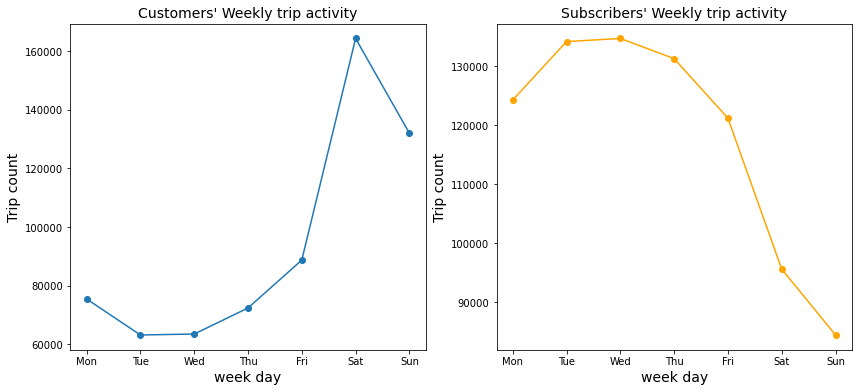

In [21]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
ax[0].plot(cus_weekly_data.index,cus_weekly_data.values,label="Customers" , marker="o")
plt.xlabel("Week day")
ax[1].plot(sub_weekly_data.index,sub_weekly_data.values,color="orange",marker="o")
ax[0].set_title("Customers' Weekly trip activity",fontsize=14)
ax[1].set_title("Subscribers' Weekly trip activity",fontsize=14)
ax[0].set_ylabel("Trip count", fontsize=14)
ax[1].set_ylabel("Trip count", fontsize=14)
ax[0].set_xlabel("week day",fontsize=14)
ax[1].set_xlabel("week day",fontsize=14)
plt.show()


The scale of the graphs are different which tells us that between 2019 alone, Customers have taken more trips than subscribers.
As much as Customers embarked on trips more than Subscribers, they use bikes less during work days. Customers observe the weekend compared to Subscribers who value work days. Customers are happily waiting for the weekend and as soon as it is approaching they begin to increase their trips.
Subscribers place more value on work days and little or no attention to weekend. They possibly see the short break as resting period.

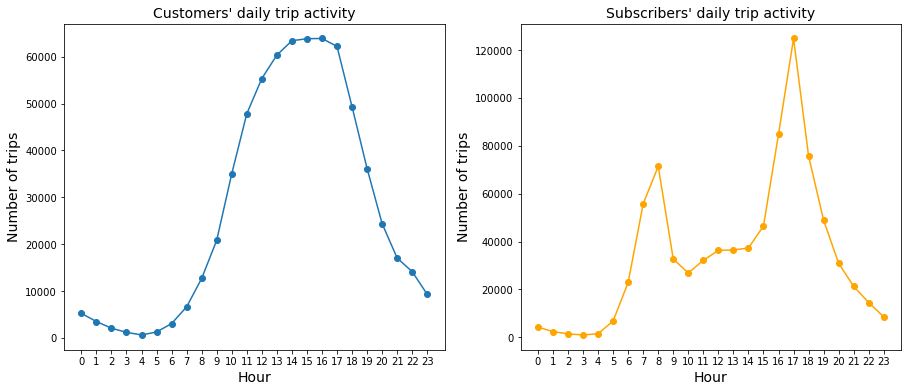

In [22]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
ax[0].plot(cus_daily_data.index,cus_daily_data.values,label="Customers" , marker="o")
plt.xlabel("Week day")
ax[1].plot(sub_daily_data.index,sub_daily_data.values,color="orange",marker="o")
ax[0].set_title("Customers' daily trip activity",fontsize=14)
ax[1].set_title("Subscribers' daily trip activity",fontsize=14)
ax[0].set_ylabel("Number of trips", fontsize=14)
ax[1].set_ylabel("Number of trips", fontsize=14)
ax[0].set_xlabel("Hour",fontsize=14)
ax[1].set_xlabel("Hour",fontsize=14)
ax[0].set_xticks(range(0,24))
ax[1].set_xticks(range(0,24))
plt.show()

On the hourly chart, both client types share bikes usage similarly at early and late hours of the day. It does make sense anway for both client types to return bikes to dock stations. Customers steadily top up their daily subscription from 8 a.m till 3p.m before deciding to return bikes to dock stations. This can only happen on weekends as it would be irresponsible of them to be actively cycling while work is at stake except the government is now paying people for riding bikes.

The subcriber clients' graph is bi-modal. They are up as early as 5 a.m  going to work. Usaully, most people woould have settled at work by 8 a.m. subscribers clearly display this characteristics. Between 9 am to 2pm they use bikes less. By 3pm, the crops of clients on night shift coupled with the people returning back home after work increase bikes usage till 5 p.m. Both Customers and Subscribers will usually return bikes to dock station around this time.

In [23]:
#create a list of index and weekday
weekday=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
season=["winter","winter","spring","spring","spring","summer","summer","summer","Autumn","Autumn","Autumn","winter"]


## Seasonality
We have established seasonality in the data. Is it possible to show the amount of trips taken in all the 4 seasons in Chicago? oh yes! it is very possible.

According to experts, Chicago's annual seasons are:
- Summer: June - August
- Fall: September - November
- Winter: December - February
- Spring: March - May
   
So let's find the number of trips per month in the whole of 2019 for the individual client subgroups.

In [24]:
month=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

#select and count number of times subscribers per month
sub=bike_data[bike_data["usertype"]=="Subscriber"].groupby(["usertype","start_month"])["trip_id"].count()
sub.index=month
#select and count number of times subscribers per month
cus=bike_data[bike_data["usertype"]=="Customer"].groupby(["usertype","start_month"])["trip_id"].count()
cus.index=month

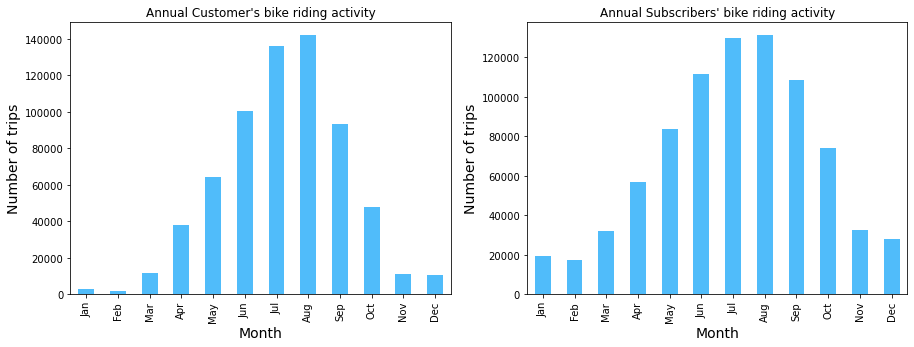

In [25]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

cus.plot(kind="bar",color='#50bcfa',ax=ax[0], title="Annual Customer's bike riding activity")
sub.plot(kind="bar",color='#50bcfa',x=ax[1],title="Annual Subscribers' bike riding activity")


#label the vertical axes
ax[0].set_ylabel("Number of trips", fontsize=14)
ax[1].set_ylabel("Number of trips", fontsize=14)
ax[0].set_xlabel("Month", fontsize=14)
ax[1].set_xlabel("Month", fontsize=14)

plt.show()

Interestly, a lot of clients begin to activitely use bikes starting from May (Spring), increases to peak in August (summer). Cycling activity gradually fall around this time until the next Spring.

Subscribers use bikes in Winter than in Customers.Their population difference could be the reason why the diffeence is noticeable

# Age Distribution
Age distrubution could be another thing to investigate while we aim to make data-driven-decision towards the prosped marketing program.
We are aware that there are some clients without birth year and we purposely left them as null values. However, the data type is numeric and we would be using it to deatermine the age of each client as at 2019. 

In [26]:
# filtering out clients without birth year
df_birthyear=bike_data[bike_data['birthyear'].notna()].copy() #filter out 
df_birthyear["birthyear"]=df_birthyear["birthyear"].astype(int) ##convert fom float to integer

df_birthyear["birthyear"].dtype

dtype('int32')

In [27]:
# determine the age difference
df_age=df_birthyear[["birthyear"]].apply(lambda birthyear: 2019-birthyear)

# make a copy of the age so that the apply function 
df_age['age_copy']=df_age["birthyear"]
df_age=df_age.rename({
    "birthyear":"age"
},axis=1)

In [28]:
df_age.describe()

,age,age_copy
count,1.064756e+06,1.064756e+06
mean,3.435020e+01,3.435020e+01
std,1.075992e+01,1.075992e+01
min,5.000000e+00,5.000000e+00
25%,2.700000e+01,2.700000e+01
50%,3.100000e+01,3.100000e+01
75%,3.900000e+01,3.900000e+01
max,2.600000e+02,2.600000e+02


### Observation
From the table above, we notice some inconsistencies with the birthyear data. No one older than 150 years will opt to ride a bike. Going forward, we are going to be making an asumption: find the age distribution of active clients which less than or eaqual to 80 years. 

elements of our age bracket are:
10-14,15-19,20-24,25-29,30-34,35,39,40-44,45,49,50,54,55-59,60-64,65-69,70-74,75-80

- create a function that determines age backet,
- the function will then be passed into apply() function

Before we proceed, let's define a function that takes the age of the client and retuns the age backet as shown below.

In [29]:

#define a function thats puts ages in a specified age brackets
def age_bracket(cell):
    
    ''' the function takes in a numeric value and
        it determines the age bracket
    '''
    
    if cell>=5 and cell <=9:
        cell= ("5-9")
    elif cell>=10 and cell <=14:
        cell= ("10-14")
    elif cell>=15 and cell <=19:
        cell= ("15-19")
    elif cell>=20 and cell <=24:
        cell= ("20-24")
    elif cell>=25 and cell <=29:
        cell= ("25-29")
    elif cell>=30 and cell <=34:
        cell= ("30-34")
    elif cell>=35 and cell <=39:
        cell= ("35-39")
    elif cell>=40 and cell <=44:
        cell= ("40-44")
    elif cell>=45 and cell <=49:
        cell= ("45-49")
    elif cell>=50 and cell <=54:
        cell= ("50-54")
    elif cell>=55 and cell <=59:
        cell= ("55-69")
    elif cell>=60 and cell <=64:
        cell= ("60-64")
    elif cell>=65 and cell <=69:
        cell= ("65-69")
    elif cell>=70 and cell <=74:
        cell= ("70-74")
    elif cell>=75 and cell <=79:
        cell= ("75-79")
    elif cell>=80 and cell <=84:
        cell= ("80-84")
    else: cell=cell
    return cell

In [30]:
temp_df=bike_data[bike_data['birthyear'].notna()]# select data having birthyear
df=temp_df.copy()# make a copy of the data frame
df["birthyear"]=df["birthyear"].astype(int) #change data type to int
#calculate the age in a new column
df["age"]=df_birthyear[["birthyear"]].apply(lambda birthyear: 2019-birthyear)
#select client 80 and below
active_age=df[df['age'].between(15,80)]
active_clients=active_age.copy()
active_clients["age_bracket"]=active_age["age"].apply(age_bracket)
active_clients[:4]

,trip_id,start_time,start_month,start_day,start_weekday,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,age_bracket
3,21742446,2019-01-01 00:13:45,1,1,1,2019-01-01 00:43:28,252,29.716667,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993,26,25-29
8,21742451,2019-01-01 00:18:43,1,1,1,2019-01-01 00:47:30,6205,28.783333,150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995,24,20-24
14,21742457,2019-01-01 00:23:54,1,1,1,2019-01-01 00:39:00,5019,15.100000,289,Wells St & Concord Ln,324,Stockton Dr & Wrightwood Ave,Subscriber,Female,1989,30,30-34
17,21742460,2019-01-01 00:24:27,1,1,1,2019-01-01 00:47:03,5777,22.600000,268,Lake Shore Dr & North Blvd,319,Greenview Ave & Diversey Pkwy,Customer,Female,1990,29,25-29


We can confirm that changes made to the data have taken taken effect. 
### up next
We will determine the general age distribution among physically active Cyclistic clients and then proceed to compare the age distribution between the two client type.

In [31]:
#determine the frequency of each age bracket
age_group=active_clients.groupby(["age_bracket"])["age"].count().reset_index()

#sort the data frame accroding to age bracket
age_group['sort_index'] = age_group['age_bracket'].str.split('-').str[0].astype(int)
age_group.sort_values(by='sort_index',axis=0, inplace=True)
age_group = age_group.iloc[:, :2]

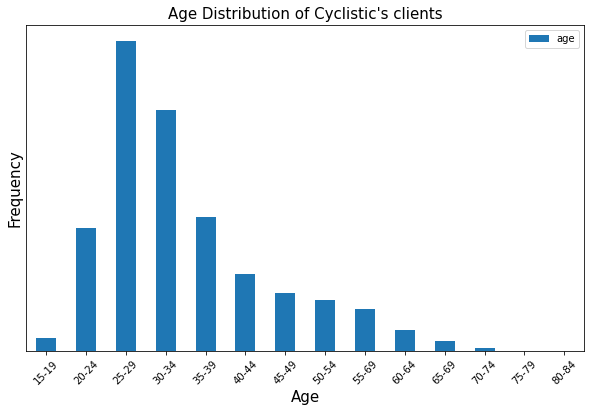

In [32]:
#display on chart
age_group.plot(x="age_bracket",y="age", kind="bar",yticks=([]),figsize=(10,6))
plt.xlabel("Age",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title("Age Distribution of Cyclistic's clients",fontsize=15)
plt.xticks(rotation=45)
plt.show()

The total of number 1,064,250 clients' age met the earlier assumed age of pysically active individuals using bikes.

The age distribution shows that people between ages 25 and 39 mostly enjoy riding bikes. Good, let's now see the age distribution of Customers and Subscribers independently


In [33]:
cus=active_clients[active_clients["usertype"]=="Customer"] #filter out subsciber clients
sub=active_clients[active_clients["usertype"]=="Subscriber"]# filter out customer clients

#create a data frame with age and number of trips for customers
cus_age=cus.groupby(["usertype","age_bracket"])["trip_id"].count().reset_index().rename({"trip_id":"no_of_trips"},axis=1)

#create a data frame with age and number of trips for customers
sub_age=sub.groupby(["usertype","age_bracket"])["trip_id"].count().reset_index().rename({"trip_id":"no_of_trips"},axis=1)

#sort the age bracket of the subsciber subgroup in ascending order of 
sub_age['sort_index'] = sub_age['age_bracket'].str.split('-').str[0].astype(int)
sub_age.sort_values(by='sort_index',axis=0, inplace=True)
sub_age = sub_age.iloc[:, :3]



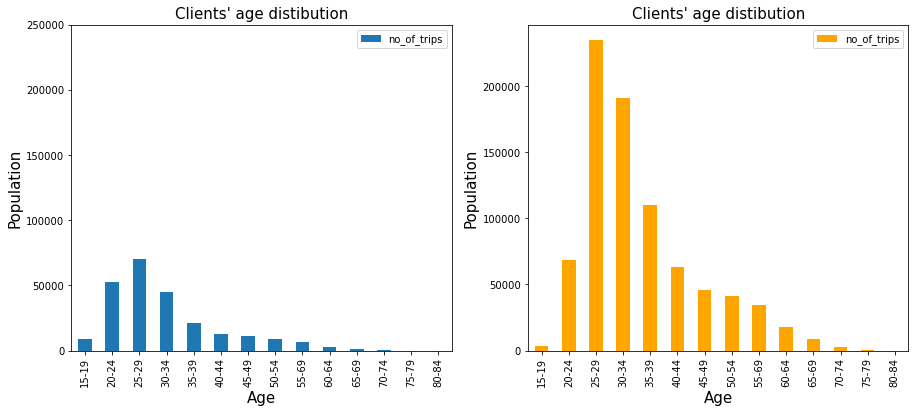

In [34]:
#display the outcome on chart
fig,ax=plt.subplots(1,2,figsize=(15,6))
cus_age.plot("age_bracket","no_of_trips",ax=ax[0], kind="bar") #customer's plot
sub_age.plot("age_bracket","no_of_trips",ax=ax[1], kind="bar",color="orange")#subscriber's plot

ax[0].set_ylabel("Population", fontsize=15)
ax[0].set_xlabel("Age",fontsize=15)
ax[0].set_title("Clients' age distibution",fontsize=15)
ax[0].set_ylim(0,250000)


ax[1].set_ylabel("Population", fontsize=15)
ax[1].set_xlabel("Age",fontsize=15)
ax[1].set_title("Clients' age distibution",fontsize=15)
plt.show()

### observation
The two graphs have been configured to have similar scale for easy compaison. It is clear that Subscribers have their ages represented than customers. The age as it stands now may not reveal the true picture as the data is bias.

Let's consider the age backet versus trip duration.


In [35]:
cus_y=cus.groupby(["usertype","age_bracket"])["tripduration"].mean().reset_index().rename({"tripduration":"mean_tripduration"},axis=1)
sub_y=sub.groupby(["usertype","age_bracket"])["tripduration"].mean().reset_index().rename({"tripduration":"mean_tripduration"},axis=1)

#sort age_bracket in ascending
sub_y['sort_index'] = sub_y['age_bracket'].str.split('-').str[0].astype(int)
sub_y.sort_values(by='sort_index',axis=0, inplace=True)
sub_y = sub_y.iloc[:, :3]

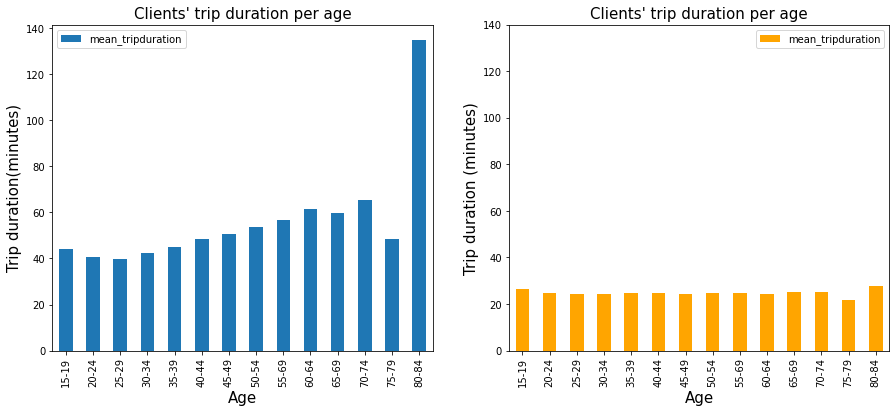

In [36]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
cus_y.plot("age_bracket","mean_tripduration",ax=ax[0], kind="bar")
sub_y.plot("age_bracket","mean_tripduration",ax=ax[1], kind="bar",color="orange")


ax[0].set_ylabel("Trip duration(minutes)", fontsize=15)
ax[0].set_xlabel("Age",fontsize=15)
ax[0].set_title("Clients' trip duration per age",fontsize=15)


ax[1].set_ylabel("Trip duration (minutes)", fontsize=15)
ax[1].set_xlabel("Age",fontsize=15)
ax[1].set_title("Clients' trip duration per age",fontsize=15)
ax[1].set_ylim(0,140)
plt.show()

Both graphs have been made to have similar scale for easy comparison
Over all, Customers spend more time on trips than Subscribers. This may be because they are very active on weekends. They have more time to visit several places or travel longer distances unlike subscribers who possibly use it to commute to work and from work back home.

## Stations Analysis

In [37]:
customer=bike_data[bike_data["usertype"]=="Customer"]

In [38]:
#from station names
customer_from=customer.groupby(["from_station_name","usertype"
                          ])["trip_id"].count().reset_index().rename({
    "trip_id":"no_of_trips"},axis=1).sort_values("no_of_trips",ascending=False).head(15)

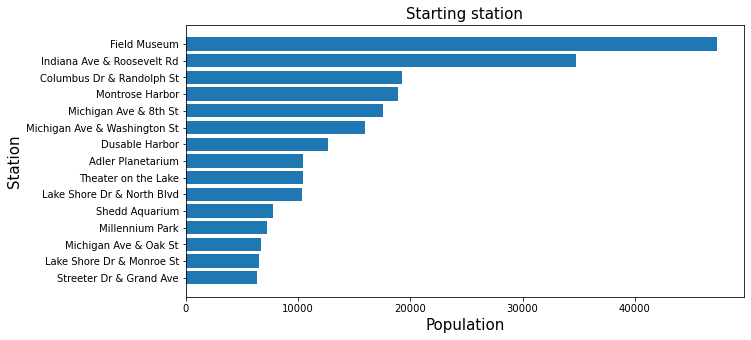

In [39]:
fig,ax=plt.subplots(figsize=(10,5))
ax.barh(customer_from["from_station_name"],customer_from["no_of_trips"].sort_values(ascending=True))
plt.xlabel("Population",fontsize=15)
plt.ylabel("Station",fontsize=15)
plt.title("Starting station",fontsize=15)
plt.show()

Most client's pick up bikes to start trip at Field Museum, followed by Indiana Ave & Roosevelt Rd


In [40]:
#from station names
customer_to=customer.groupby(["to_station_name","usertype"
                          ])["trip_id"].count().reset_index().rename({
    "trip_id":"no_of_trips"},axis=1).sort_values("no_of_trips",ascending=False).head(15)

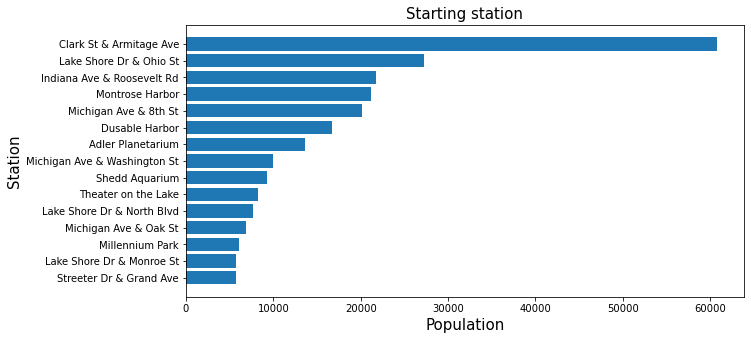

In [41]:
fig,ax=plt.subplots(figsize=(10,5))
ax.barh(customer_to["to_station_name"],customer_to["no_of_trips"].sort_values(ascending=True))
plt.xlabel("Population",fontsize=15)
plt.ylabel("Station",fontsize=15)
plt.title("Starting station",fontsize=15)
plt.show()

Places like Clark St & Armitage Ave, Lake shore Dr &Ohio St are packed with cafes, restaurants and sweet shops. Again we can see the "catch fun" attributes of a customer.

In [42]:
from_to_station = (np.full((bike_data.shape[0]),'From ')
            + bike_data['from_station_name']
            + np.full((bike_data.shape[0]),' to ')
            + bike_data['to_station_name']
       ).value_counts()


In [43]:
jouney=from_to_station.reset_index().rename({
    "index":"from_station_to",
    0:"no_of_trips"
},axis=1).head(15)

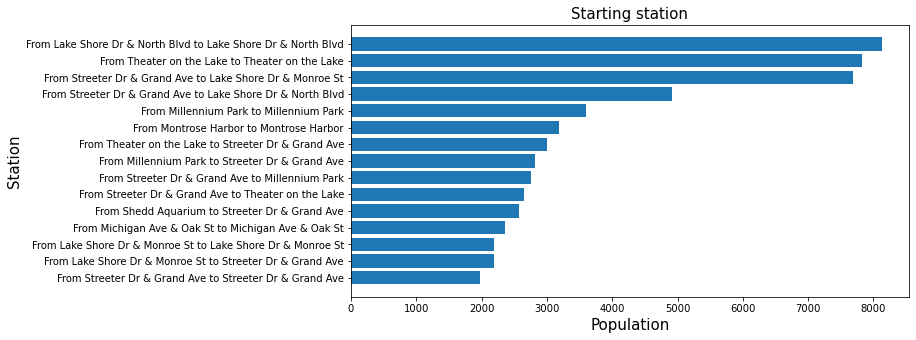

In [44]:
fig,ax=plt.subplots(figsize=(10,5))
ax.barh(jouney["from_station_to"],jouney["no_of_trips"].sort_values(ascending=True))
plt.xlabel("Population",fontsize=15)
plt.ylabel("Station",fontsize=15)
plt.title("Starting station",fontsize=15)
plt.show()

This graph shows customer clients' movement from one station to the order.

# Conclusion

Customers and subscibers were observed to use bikes diffently. There is a high chance that Customers use bikes for recreation because most of the places visited are packed with cafes, restaurants, sweet shops etc. An uncommonly trend is also noticeable among the Subscriber subgroups.They seemed to be more intentional using bikes on work days. It would be out of place to assume that customer clients will fit into the same shoe size as Subscribers. they see no reason to pay annually because they use bike mostly on weekends and opting to pay per use is economical to them. 


It was also found out that seasonality affect bike usage. Clients go fo more trips and stay longer in trip much more  during summer and Autumn than in Spring and Winter. The active ages of the riders are normaly distributed and clients with ages between 20-39 were found to use bikes more.

# Recommendation
- Develop and make weekend subscription plan available at a reasonable discount
- The marketing program should emphasize on the incentives/benefits of this new subsciption plan
- It is best to roll out engaging Ads starting from April to september
- Install engaging billboard in  locations having more concentration of Customer clients 